In [21]:
import numpy as np
import IM_rank_correlations as IMR
import measure_classification as mc;
import compute_invariance as compute_invariance;

In [22]:
ranks_matrix = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
measures_arr = ranks_matrix.measures_arr;
measures_dict = ranks_matrix.measures_dict;

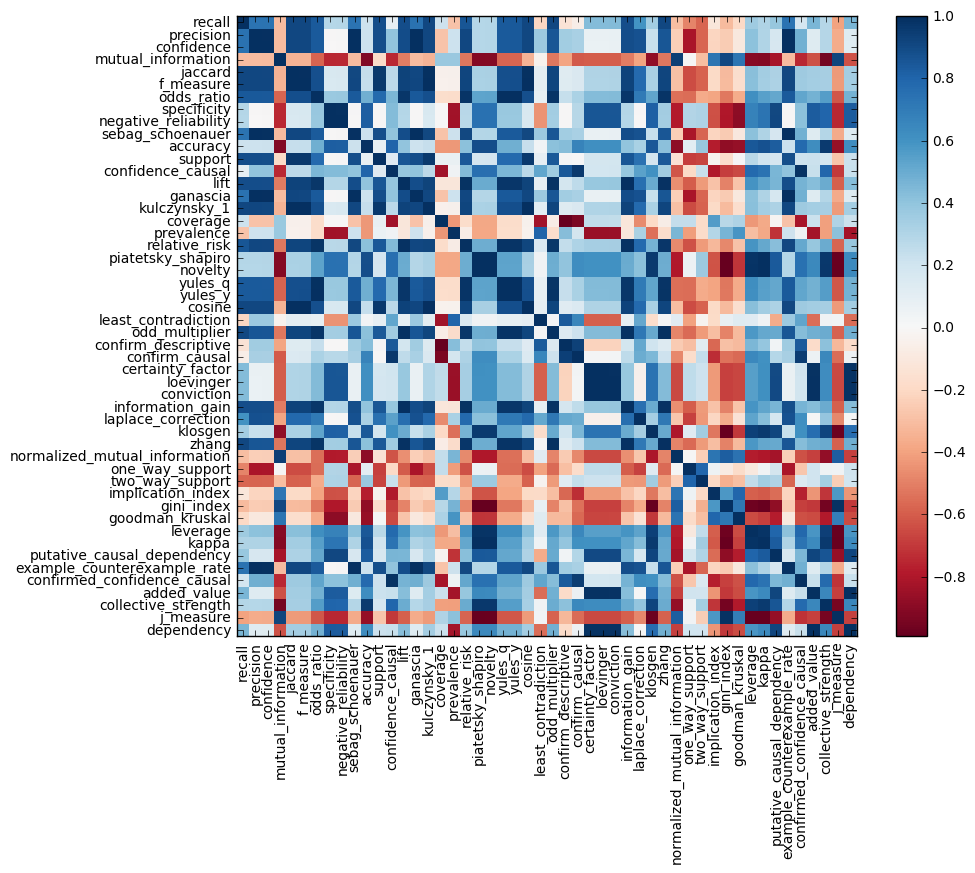

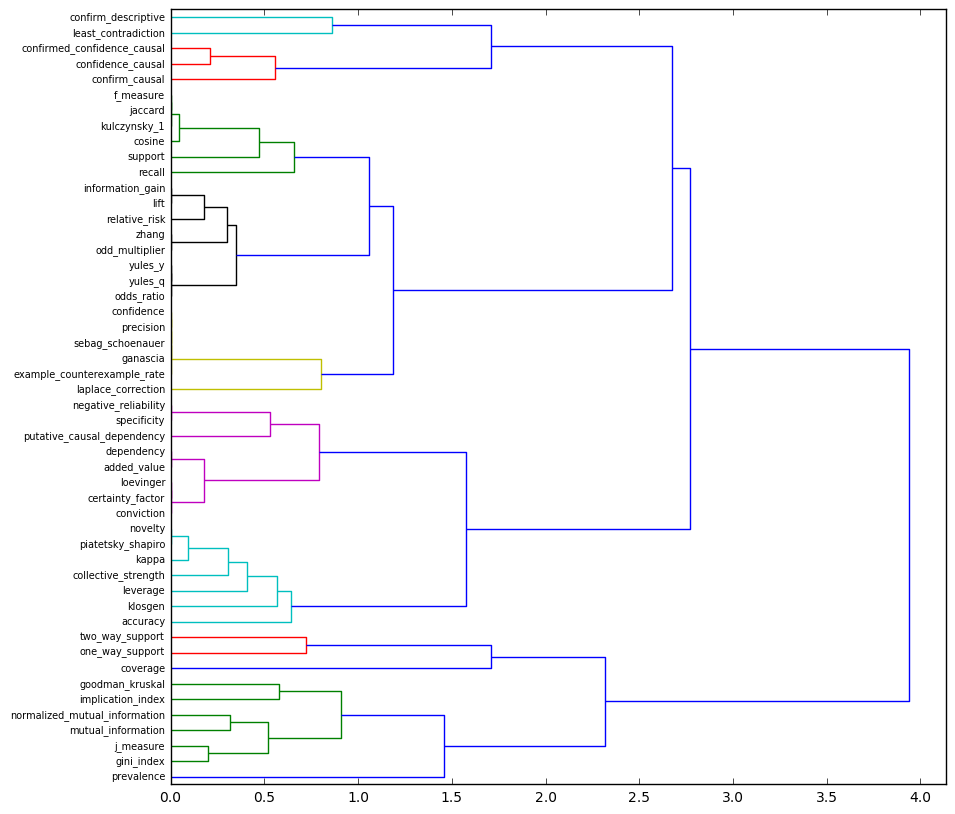

In [23]:
ranks_matrix.visualize()

confidence precision 1.0
confidence precision 1.0
f_measure jaccard 1.0
f_measure jaccard 1.0
negative_reliability specificity 1.0
negative_reliability specificity 1.0
sebag_schoenauer confidence 1.0
sebag_schoenauer confidence 1.0
ganascia sebag_schoenauer 1.0
ganascia sebag_schoenauer 1.0
kulczynsky_1 f_measure 1.0
kulczynsky_1 f_measure 1.0
novelty piatetsky_shapiro 1.0
novelty piatetsky_shapiro 1.0
yules_q odds_ratio 1.0
yules_q odds_ratio 1.0
yules_y yules_q 1.0
yules_y yules_q 1.0
loevinger certainty_factor 1.0
loevinger certainty_factor 1.0
conviction loevinger 1.0
conviction loevinger 1.0
information_gain lift 1.0
information_gain lift 1.0
zhang odd_multiplier 1.0
zhang odd_multiplier 1.0
example_counterexample_rate ganascia 1.0
example_counterexample_rate ganascia 1.0
dependency added_value 1.0
dependency added_value 1.0
35


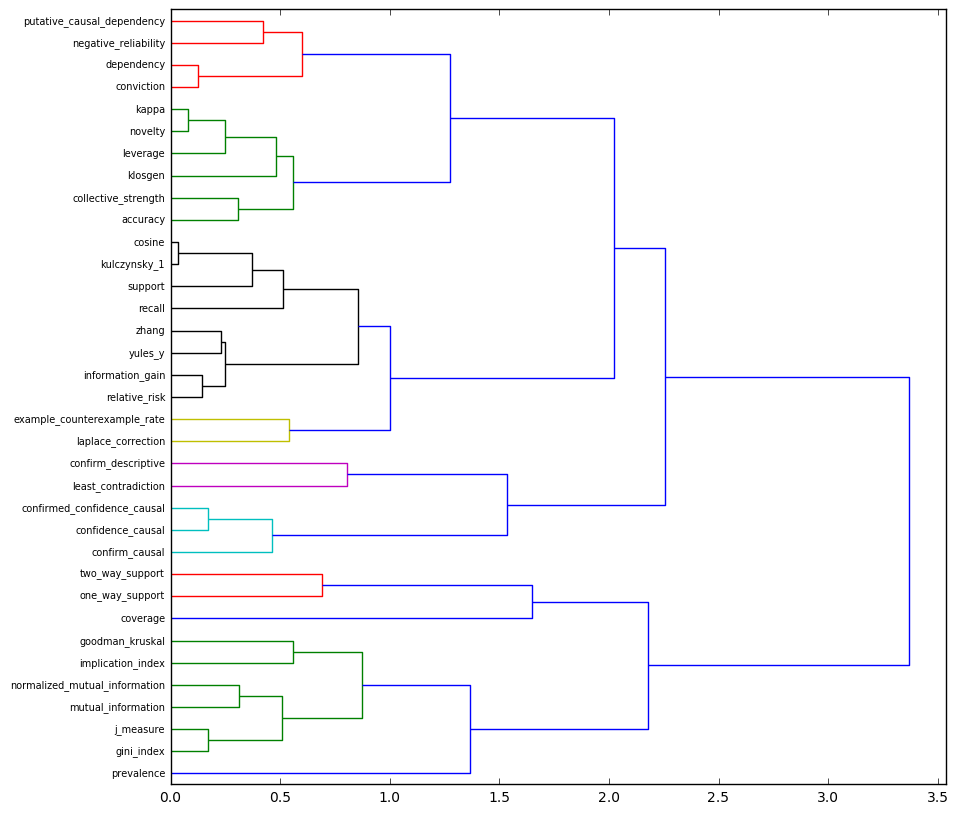

In [24]:
def find_redundant(measures_arr, ranks_matrix):
#     print(len(measures_arr))
    for i in range(len(measures_arr)):
        for j in range(len(measures_arr)):
            if (i > j):
#                 print(ranks_matrix)
                if (np.around(ranks_matrix.corr_spearman[i][j], 4) == 1):
                    print(measures_arr[i],measures_arr[j], ranks_matrix.corr_spearman[i][j]);
                    return(j);

# remove redundant measures
while find_redundant(measures_arr, ranks_matrix):
    i = find_redundant(measures_arr, ranks_matrix);
    measures_dict, measures_arr = ranks_matrix.remove_outliers(i);
    
print(len(measures_arr))
ranks_matrix.show_dendrogram()

In [25]:
def find_outlier(clusters):
    arr = []
    for i in range(len(clusters)):
        if len(clusters[i]) == 1:
            arr.append(clusters[i]);
    return np.array(arr);


# while len(find_outlier(clusters)):
#     idx_outliers = find_outlier(clusters);
#     print(measures_arr[idx_outliers]);
#     measures_dict, measures_arr = ranks_matrix.remove_outliers(idx_outliers);
#     clusters = ranks_matrix.form_clusters(n_clusters);

In [26]:
def form_clusters(n_clusters=10, ranks_matrix=ranks_matrix):
    # n_clusters = 10;
    clusters = ranks_matrix.form_clusters(n_clusters);
    return clusters

#prints the measures list in each of the clusters
def print_cluster_set(clusters, ma):
    for idx, cluster in enumerate(clusters):
        print(len(cluster), cluster);        
        print(ma[cluster]);

#forms a cluster vector corresponding to the lengths of the clusters
def form_cluster_set(clusters):
    cluster_vector = np.empty(len(clusters), int);
    for idx, cluster in enumerate(clusters):
        cluster_vector[idx] = len(cluster);
    return cluster_vector;

In [27]:
def cluster_set_1():
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(10, rm);
    misc_cluster = np.array([], int);
    misc_cluster = np.append(misc_cluster, clusters[2]);
    misc_cluster = np.append(misc_cluster, clusters[5]);
    misc_cluster = np.append(misc_cluster, clusters[6]);
    misc_cluster = np.append(misc_cluster, clusters[7]);

    clusters_new = [];
    clusters_new.append(clusters[0]);
    clusters_new.append(clusters[1]);
    clusters_new.append(clusters[3]);
    clusters_new.append(clusters[4]);
    clusters_new.append(misc_cluster);

    clusters_new = np.array(clusters_new);

#     print([measures_arr[clusters_new[i]] for i in range(len(clusters_new))])
    # print(clusters_new)
    return (clusters_new, md, ma);


In [28]:
def cluster_set_2():
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    return (clusters, md, ma);

In [29]:
def cluster_set_3():
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(4, rm);
    return (clusters, md, ma);

In [30]:
def cluster_set_4():
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    while find_redundant(ma, rm):
        i = find_redundant(ma, rm);
        md, ma = rm.remove_outliers(i);
    
    clusters = form_clusters(2, rm);
    
    #removing the cluster with the outliers
    md, ma = rm.remove_outliers(clusters[1]);
    
    clusters = form_clusters(5, rm);
    
    return (clusters, md, ma);

# c,d,a = cluster_set_4();
# print_cluster_set(c,a)

In [31]:
def cluster_set_tew_2():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['leverage'], 
                         md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information'], md['laplace_correction']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk'], md['coverage'], md['implication_index']]);
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_2, measures_dict_tew_2, measures_arr_tew_2) = cluster_set_tew_2();

In [32]:
def cluster_set_tew_4():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang'], md['yules_y'], md['confirm_causal'], 
                         md['putative_causal_dependency'], md['klosgen'], md['dependency'], 
                         md['one_way_support'], md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_4, measures_dict_tew_4, measures_arr_tew_4) = cluster_set_tew_4();

In [33]:
def cluster_set_tew_5():
    
    from Measures import form_measures_dict;
    rm = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
    ma = rm.measures_arr;
    md = rm.measures_dict;
    rm.compute_correlation();
    
    def form_cluster_array(md):
        clusters = [];

        clusters.append([md['support'], md['prevalence'], md['least_contradiction'], 
                         md['example_counterexample_rate'], md['confirm_descriptive'], md['laplace_correction']]);
        clusters.append([md['leverage'], md['confidence_causal'], md['confirmed_confidence_causal'], 
                         md['conviction'], md['zhang']]);
        clusters.append([md['yules_y'], md['confirm_causal'], md['putative_causal_dependency'], 
                         md['klosgen'], md['dependency'], md['one_way_support'],
                         md['goodman_kruskal'], md['accuracy'], 
                         md['cosine'], md['kulczynsky_1'], md['information_gain'], 
                         md['novelty'], md['two_way_support'], md['collective_strength'], 
                         md['kappa'], md['mutual_information'], md['j_measure'], 
                         md['gini_index'], md['normalized_mutual_information']]);
        
        clusters.append([md['recall'], md['negative_reliability'], md['relative_risk']]);
        clusters.append([md['coverage'], md['implication_index']]);
                        
        clusters = np.array(clusters);
        return clusters
    
    clusters = form_cluster_array(md);
    
    clusters_flat = np.empty(0, int);
    
    for cluster in clusters:
        clusters_flat = np.append(clusters_flat, cluster);
    
    ma = ma[clusters_flat];
    md = form_measures_dict(ma);

    clusters = form_cluster_array(md);

    return (clusters, md, ma);

(clusters_tew_5, measures_dict_tew_5, measures_arr_tew_5) = cluster_set_tew_5();

In [41]:
def return_homogeneity(cluster_set, measures_dict):

    #old properties
#     (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

#     # new properties
    (properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);
    (support_array, entropy_array) = compute_invariance.compute_supports_updated(properties_array);
    
    cluster_property_array = compute_invariance.compute_property_frequencies_in_cluster_set_updated(properties_array, cluster_set);
    cluster_vector = form_cluster_set(cluster_set);
    print(cluster_vector);

    for idx, property_vector in enumerate(cluster_property_array):
        # property_vector is (n_prop_states, n_clusters)
#         homo = compute_invariance.compute_homogeneity(property_vector, cluster_vector)

        # Property names
        print(property_names[idx]);

        # Entropy of split
#         print(entropy_array[idx]);
        
    
    #-----old properties------
        # Original split of properties
#         print([np.sum(property_vector[1,:]), np.sum(property_vector[0,:])])

#         print(support_array[idx,1]);     #prints support for each prop_state

        
        # property counts of '-1' in new and '0' in old
#         print(property_vector[0,:]);
        
        # property counts of '0' in new and '1' in old
#         print(property_vector[1,:]);
#         print(homo)        
    
    #------new properties------
        # Original split of properties
#         print([int(np.sum(property_vector[0,:])),
#                int(np.sum(property_vector[1,:])),
#                int(np.sum(property_vector[2,:]))]);

#         print(support_array[idx,2]);     #prints support for each prop_state

        # property counts of '-1' in new 
#         print(property_vector[0,:]);
        
        # property counts of '0' in new
#         print(property_vector[1,:]);
        
        # property counts of '1' in new
#         print(property_vector[2,:]);

#         print(homo)

# return_homogeneity(clusters_2, measures_dict_2);

In [36]:
# input a cluster set and specify which property and output will be the measures satisfying the properties and their cluster
def cluster_measures_satisfying_property(cluster_set, measures_arr, measures_dict):
    (properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);
    for idx, cluster in enumerate(cluster_set):
        for idc, measure in enumerate(cluster):
            if (properties_array[measure, 7]):
                print(measures_arr[measure], idx)
                
cluster_measures_satisfying_property(clusters_2, measures_arr_2, measures_dict_2)

recall 0
kulczynsky_1 0
cosine 0
least_contradiction 0
laplace_correction 0
example_counterexample_rate 0


In [35]:
# (clusters_1, measures_dict_1, measures_arr_1) = cluster_set_1();
(clusters_2, measures_dict_2, measures_arr_2) = cluster_set_2();
# (clusters_3, measures_dict_3, measures_arr_3) = cluster_set_3();
# (clusters_4, measures_dict_4, measures_arr_4) = cluster_set_4();
# (clusters_tew, measures_dict_tew, measures_arr_tew) = cluster_set_tew();


confidence precision 1.0
confidence precision 1.0
f_measure jaccard 1.0
f_measure jaccard 1.0
negative_reliability specificity 1.0
negative_reliability specificity 1.0
sebag_schoenauer confidence 1.0
sebag_schoenauer confidence 1.0
ganascia sebag_schoenauer 1.0
ganascia sebag_schoenauer 1.0
kulczynsky_1 f_measure 1.0
kulczynsky_1 f_measure 1.0
novelty piatetsky_shapiro 1.0
novelty piatetsky_shapiro 1.0
yules_q odds_ratio 1.0
yules_q odds_ratio 1.0
yules_y yules_q 1.0
yules_y yules_q 1.0
loevinger certainty_factor 1.0
loevinger certainty_factor 1.0
conviction loevinger 1.0
conviction loevinger 1.0
information_gain lift 1.0
information_gain lift 1.0
zhang odd_multiplier 1.0
zhang odd_multiplier 1.0
example_counterexample_rate ganascia 1.0
example_counterexample_rate ganascia 1.0
dependency added_value 1.0
dependency added_value 1.0


In [ ]:
(properties_array, property_names, support_array, entropy_array) = compute_invariance.compute_property_vectors(measures_dict);

In [ ]:
properties_array[:,8], measures_arr[1]

In [ ]:
return_homogeneity(clusters_4, measures_dict_4)

In [ ]:
(properties_array, property_names, support_array) = compute_invariance.compute_property_vectors(measures_dict);
X,Y = mc.initialize_X_Y(measures_arr, properties_array);

In [ ]:
X = properties_array;
Y = mc.assign_clusters_to_Y(clusters_1, Y);
X.shape

In [ ]:
# import scipy.spatial.distance as ssd
# import scipy.misc as sm;
# import numpy as np;

# for c in range(len(clusters)):
#     n= sm.comb(len(clusters[c]),2);
#     arr = np.zeros(n, float);
# #     print(c)
#     k=0;
#     for i in clusters[c]:
#         for j in clusters[c]:
#             if (i > j):
# #                 print(measures_arr[i], measures_arr[j]);
# #                 print(X[i], X[j])
#                 arr[k] = ssd.hamming(X[i], X[j]);
#                 k += 1;
#     print(np.average(arr))
# # print(measures_arr[clusters[0][1]], measures_arr[clusters[0][2]])
# # ssd.jaccard(X[clusters[0][1]], X[clusters[0][4]])

In [ ]:
np.sum(X[:,0])

In [ ]:
predictions, tree_classifier = mc.classify_decision_tree(X,Y, criterion='gini');
print(tree_classifier.score(X,Y))

In [ ]:
mc.export_to_pdf(tree_classifier, n_clusters, len(measures_arr))

In [ ]:
# to_remove = np.empty(0, int);
# arr = measures_arr[(X[:,344] == -1) & ((X[:,56] == 1)) & ((X[:,387] == -1)) & ((X[:,419] == -1))]

# for measure in measures_arr:
#     if measure not in arr:
#         to_remove = np.append(to_remove, measures_dict[measure]);
        
# measures_dict, measures_arr = ranks_matrix.remove_outliers(to_remove);

In [19]:
# measures_arr[(X[:,0] == 0) & ((X[:,1] == 0)) & ((X[:,2] == 0)) & ((X[:,4] == 0)) & ((X[:,5] == 0)) & ((X[:,6] == 0)) & ((X[:,7] == 0))]
# measures_arr[(X[:,344] == -1) & ((X[:,56] == 1)) & ((X[:,387] == -1)) & ((X[:,419] == -1))]

In [96]:
tabs_sparse = IMR.tables_sparse;
tabs_dense = IMR.tables_dense;
rm_sparse = IMR.ranks(IMR.scores_matrix_sparse, IMR.measures_arr);
rm_dense = IMR.ranks(IMR.scores_matrix_dense, IMR.measures_arr);

ma = rm.measures_arr;
md = rm.measures_dict;
rm_sparse.compute_correlation();
rm_dense.compute_correlation();
# rm.show_dendrogram()

In [106]:
measure_1 = 'gini_index'; measure_2 = 'one_way_support';
rm_sparse.corr_spearman[md[measure_1],md[measure_2]], rm_dense.corr_spearman[md[measure_1],md[measure_2]]

(-0.078952060138980706, -0.8608233542556688)

In [117]:
# r1, r2 = 0,10;
# rm.ranks[r1:r2, md[measure_1]] , rm.ranks[r1:r2, md[measure_2]]

In [118]:
# rm.scores[r1:r2, md[measure_1]], rm.scores[r1:r2, md[measure_2]]

In [119]:
# tabs[r1:r2]

In [132]:
rm = rm_sparse;
tabs = tabs_sparse;
u_lc, c_lc = np.unique(rm.ranks[:,md[measure_1]], return_counts=True)

In [133]:
tabs_lc = np.empty((0,4), int);
for idx, u in enumerate(u_lc):
    t = tabs[rm.ranks[:, md[measure_1]] == u];
    tabs_lc = np.concatenate((tabs_lc, t));

In [134]:
(rm_lc, sm_lc) = IMR.create_ranks_matrix(tabs_lc, ma)

In [40]:
# # tabs_lc_rc = np.empty((0,4), int);
# for i in range(len(tabs_lc)):
#     # checks wherever cosine ranks improves in the next table
#     if (i < len(tabs_lc)-1) and (rm_lc.ranks[i, md[measure_2]] > rm_lc.ranks[i+1, md[measure_2]]):
# #         print(tabs_lc[i-1],
# #               rm_lc.ranks[i-1, md[measure_1]], rm_lc.ranks[i-1, md[measure_2]],
# #               rm_lc.scores[i-1, md[measure_1]], rm_lc.scores[i-1, md[measure_2]]);
#         print(tabs_lc[i],
#               rm_lc.ranks[i, md[measure_1]], rm_lc.ranks[i, md[measure_2]],
#               rm_lc.scores[i, md[measure_1]], rm_lc.scores[i, md[measure_2]]);
#         print(tabs_lc[i+1],
#               rm_lc.ranks[i+1, md[measure_1]], rm_lc.ranks[i+1, md[measure_2]],
#               rm_lc.scores[i+1, md[measure_1]], rm_lc.scores[i+1, md[measure_2]]);
#         print('-')

In [136]:
def f11_perturb(t, increase = True):
    i = 5;
    if not increase:
        i = -i;
    return t + np.array([i,0,0,0]);

def f10_perturb(t, increase = True):
    i = 5;
    if not increase:
        i = -i;
    return t + np.array([0,i,0,0]);

def f01_perturb(t, increase = True):
    i = 5;
    if not increase:
        i = -i;
    return t + np.array([0,0,i,0]);

def f00_perturb(t, increase = True):
    i = 5;
    if not increase:
        i = -i;
    return t + np.array([0,0,0,i]);        

In [36]:
def compute_score_perturbation(table,handle_pair):
    for h in handle_pair:
        table = h[0](table,h[1]);
    t = table;
    t_object = IMR.contingency_table(t);
    t_object.compute_scores();
    return t_object;

In [90]:

# t_ct = compute_score_perturbation(t, [])
# t_ct_f11 = compute_score_perturbation(t, [[f11_perturb,True]])
# t_ct_f10 = compute_score_perturbation(t, [[f10_perturb,True]])
# t_ct_f01 = compute_score_perturbation(t, [[f01_perturb,True]])
# t_ct_f00 = compute_score_perturbation(t, [[f00_perturb,True]])
# t_ct_f01_f10 = compute_score_perturbation(t, [[f01_perturb,True], [f10_perturb,True]])

In [98]:
def perturbation_array(t, measure):
    arr = np.empty(0);
#     print(measure)
    t_ct = compute_score_perturbation(t, [])
#     print(getattr(t_ct,measure)())
    order = [True, False];

    for o1 in order:
#         print(o1)
        t_ct_f11 = compute_score_perturbation(t, [[f11_perturb,o1]]);
        diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11, measure)());
        arr = np.append(arr, diff);

        t_ct_f10 = compute_score_perturbation(t, [[f10_perturb,o1]]);
        diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f10, measure)());
        arr = np.append(arr, diff);

        t_ct_f01 = compute_score_perturbation(t, [[f01_perturb,o1]]);
        diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f01, measure)());
        arr = np.append(arr, diff);

        t_ct_f00 = compute_score_perturbation(t, [[f00_perturb,o1]]);
        diff = np.sign(np.around(getattr(t_ct, measure)() - getattr(t_ct_f00, measure)(), decimals=8));
        arr = np.append(arr, diff);
    
    for o1 in order:
        for o2 in order:
#             print(o1,o2)
            t_ct_f11_f10 = compute_score_perturbation(t, [[f11_perturb,o1], [f10_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f10, measure)());
            arr = np.append(arr, diff);
            
            t_ct_f11_f01 = compute_score_perturbation(t, [[f11_perturb,o1], [f01_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f01, measure)());
            arr = np.append(arr, diff);
            
            t_ct_f11_f00 = compute_score_perturbation(t, [[f11_perturb,o1], [f00_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f00, measure)());
            arr = np.append(arr, diff);
            
            t_ct_f10_f01 = compute_score_perturbation(t, [[f10_perturb,o1], [f01_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f10_f01, measure)());
            arr = np.append(arr, diff);
            
            t_ct_f10_f00 = compute_score_perturbation(t, [[f10_perturb,o1], [f00_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f10_f00, measure)());
            arr = np.append(arr, diff);
            
            t_ct_f01_f00 = compute_score_perturbation(t, [[f01_perturb,o1], [f00_perturb,o2]]);
            diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f01_f00, measure)());
            arr = np.append(arr, diff);
    
    for o1 in order:
        for o2 in order:
            for o3 in order:
#                 print(o1,o2,o3);
                t_ct_f11_f10_f01 = compute_score_perturbation(t, [[f11_perturb,o1], [f10_perturb,o2], [f01_perturb,o3]]);
                diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f10_f01, measure)());
                arr = np.append(arr, diff);
                
                t_ct_f11_f10_f00 = compute_score_perturbation(t, [[f11_perturb,o1], [f10_perturb,o2], [f00_perturb,o3]]);
                diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f10_f00, measure)());
                arr = np.append(arr, diff);
                
                t_ct_f11_f01_f00 = compute_score_perturbation(t, [[f11_perturb,o1], [f01_perturb,o2], [f00_perturb,o3]]);
                diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f01_f00, measure)());
                arr = np.append(arr, diff);
                
                t_ct_f10_f01_f00 = compute_score_perturbation(t, [[f10_perturb,o1], [f01_perturb,o2], [f00_perturb,o3]]);
                diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f10_f01_f00, measure)());
                arr = np.append(arr, diff);

    for o1 in order:
        for o2 in order:
            for o3 in order:
                for o4 in order:
#                     print(o1,o2,o3,o4)
                    t_ct_f11_f10_f01_f00 = compute_score_perturbation(t, [[f11_perturb,o1], [f10_perturb,o2],
                                                                          [f01_perturb,o3], [f00_perturb,o4]]);
                    diff = np.sign(getattr(t_ct, measure)() - getattr(t_ct_f11_f10_f01_f00, measure)());
                    arr = np.append(arr, diff);
        
    return arr;
    
# arr1 = perturbation_array(t, 'information_gain')
# arr2 = perturbation_array(t, 'mutual_information')
# arr3 = perturbation_array(t, 'normalized_mutual_information')
for a in perturbation_array(t, 'kappa'):
    print(a)

-1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [63]:
t_ct = compute_score_perturbation(t, [])
measure = 'mutual_information';
t_ct_f00 = compute_score_perturbation(t, [[f00_perturb,True]]);
diff = getattr(t_ct, measure)() - getattr(t_ct_f00, measure)();
# arr = np.append(arr, diff);
print(np.sign(np.around(diff, decimals=8)))

1.0


In [76]:
from scipy.spatial import distance;

In [100]:
t_sparse = np.array([10, 565, 757, 4353]);
t_dense = np.array([4545, 2132, 2166, 1232]);

print(distance.hamming(perturbation_array(t_sparse, 'gini_index'), perturbation_array(t_sparse, 'one_way_support')))
print(distance.hamming(perturbation_array(t_dense, 'gini_index'), perturbation_array(t_dense, 'one_way_support')))

print(rm_sparse.corr_spearman[md['gini_index'],md['one_way_support']])
print(rm_dense.corr_spearman[md['gini_index'],md['one_way_support']])

0.15
0.025
-0.078952060139
-0.860823354256


In [120]:
tabs_lc_rc = np.empty((0,4), int);

for u in subsequence(rm_rc.ranks[:,md['least_contradiction']]):
#     print(u)
    t = tabs_lc[rm_rc.ranks[:,md['least_contradiction']] == u];
    tabs_lc_rc = np.concatenate((tabs_lc_rc, t))
#     print(tabs_lc[ rm_lc.ranks[:,md['recall']] == u])
print(tabs_lc_rc.shape)

(252, 4)


In [121]:
(rm_lc_rc, sm_lc_rc) = IMR.create_ranks_matrix(tabs_lc_rc, ma)
rm_lc_rc.compute_correlation()

In [122]:
rm_lc_rc.corr_spearman[md['recall'], md['least_contradiction']]

-0.015750029386752164

In [70]:
def subsequence(seq):
    if not len(seq):
        return seq

    M = [None] * len(seq)    # offset by 1 (j -> j-1)
    P = [None] * len(seq)

    # Since we have at least one element in our list, we can start by 
    # knowing that the there's at least an increasing subsequence of length one:
    # the first element.
    L = 1
    M[0] = 0

    # Looping over the sequence starting from the second element
    for i in range(1, len(seq)):
        # Binary search: we want the largest j <= L
        #  such that seq[M[j]] < seq[i] (default j = 0),
        #  hence we want the lower bound at the end of the search process.
        lower = 0
        upper = L

        # Since the binary search will not look at the upper bound value,
        # we'll have to check that manually
        if seq[M[upper-1]] < seq[i]:
            j = upper

        else:
            # actual binary search loop
            while upper - lower > 1:
                mid = (upper + lower) // 2
                if seq[M[mid-1]] < seq[i]:
                    lower = mid
                else:
                    upper = mid

            j = lower    # this will also set the default value to 0

        P[i] = M[j-1]

        if j == L or seq[i] < seq[M[j]]:
            M[j] = i
            L = max(L, j+1)

    # Building the result: [seq[M[L-1]], seq[P[M[L-1]]], seq[P[P[M[L-1]]]], ...]
    result = []
    pos = M[L-1]
    for _ in range(L):
        result.append(seq[pos])
        pos = P[pos]

    return result[::-1]    # reversing


In [37]:
(properties_array, property_names) = compute_invariance.compute_new_property_vectors(measures_dict);

In [39]:
properties_array
print( np.logical_and(properties_array[0],properties_array[1]));


[ True  True  True  True  True  True  True False False  True]
